In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_images(source_dir):
    imgs = []
    
    for (dirpath, dirnames, filenames) in os.walk(source_dir):
        imgs.extend([filename for filename in filenames if filename.endswith('.jpg') or filename.endswith('.png')])
        break
    
    image_list = [cv2.imread(os.path.join(source_dir, img), 1) for img in imgs]

    return image_list

In [125]:
img_list = load_images('../input_image/parrington')

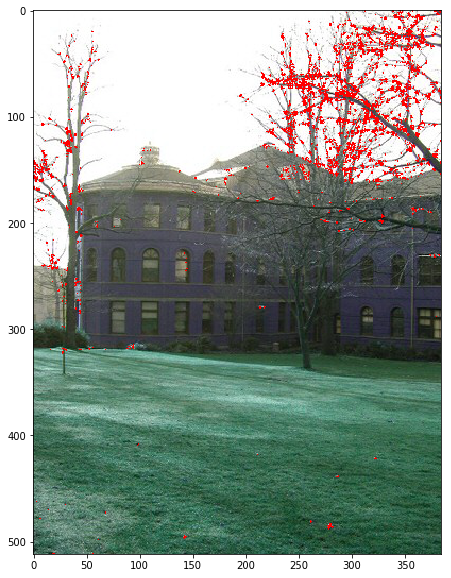

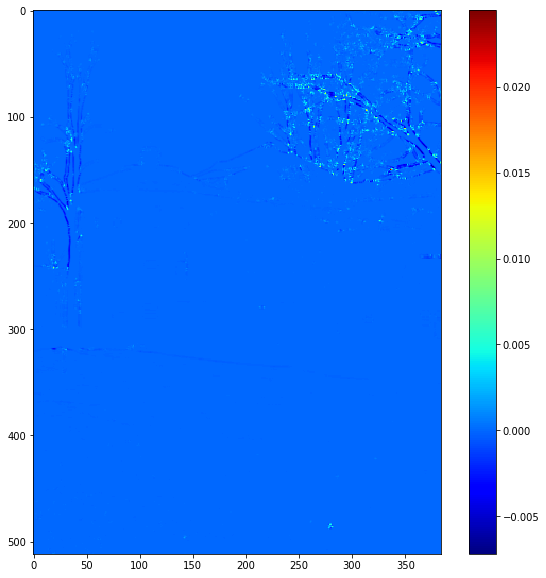

In [126]:
img = img_list[0].copy()
dst = cv2.cornerHarris(img[:,:,0],2,3,0.04)

#result is dilated for marking the corners, not important
#dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(dst, cmap='jet')
plt.colorbar()
plt.show()

In [130]:
def harris_corner(img, k=0.04, block_size=2, kernel=11):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)/255
    #gray = cv2.GaussianBlur(gray, (kernel, kernel), 0)

    corner_response = np.zeros(shape=gray.shape, dtype=np.float32)
    
    height, width, _ = img.shape
    dx = cv2.Sobel(gray, -1, 1, 0)
    dy = cv2.Sobel(gray, -1, 0, 1)
    #print(dx.dtype, gray.dtype)
    Ixx = dx*dx
    Iyy = dy*dy
    Ixy = dx*dy
    
    corners = np.array([[0, 0, 0]], dtype=np.float32)
    cov_xx = cv2.boxFilter(Ixx, -1, (block_size, block_size))
    cov_yy = cv2.boxFilter(Iyy, -1, (block_size, block_size))
    cov_xy = cv2.boxFilter(Ixy, -1, (block_size, block_size))
    #plt.imshow(dx, cmap='jet')
    #plt.colorbar()
    #plt.show()
    #print(Ixx,cov_xx)

    for y in range(height):
        for x in range(width):
            xx = cov_xx[y][x]
            yy = cov_yy[y][x]
            xy = cov_xy[y][x]
            #xx = Ixx[y:y+block_size, x:x+block_size].sum()
            #yy = Iyy[y:y+block_size, x:x+block_size].sum()
            #xy = Ixy[y:y+block_size, x:x+block_size].sum()
            
            # M = [[Sxx, Sxy],
            #      [Sxy, Syy]]
            det_M = xx*yy - xy**2
            trace_M = xx + yy
            
            R = det_M - k*trace_M**2
            corner_response[y][x] = R
            #if R > 0:
            #    index = np.searchsorted(corners[:,2], R)
            #    corners = np.insert(corners, index, [x, y, R], axis=0)
            
    return corner_response
    

In [131]:
cm = harris_corner(img_list[0], kernel=7)
#c[dst>0.01*dst.max()]=[0,0,255]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.03549708e-03,   1.30315408e-01,   5.03460288e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.03549708e-03,   1.30315408e-01,   5.03460288e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.31442323e-02,   1.67145971e-02,   6.93190992e-02],
       ..., 
       [  2.82669836e-03,   2.82669836e-03,  -2.25020163e-02, ...,
          1.87668138e-05,   3.09637721e-06,   6.34433582e-06],
       [  2.68004257e-02,   2.68004257e-02,  -9.39643849e-03, ...,
          3.32953496e-04,   5.58099637e-05,   2.05485703e-05],
       [  2.72590928e-02,   2.72590928e-02,   8.85962229e-03, ...,
          3.21821972e-05,   1.64223657e-05,   3.47056521e-05]], dtype=float32)

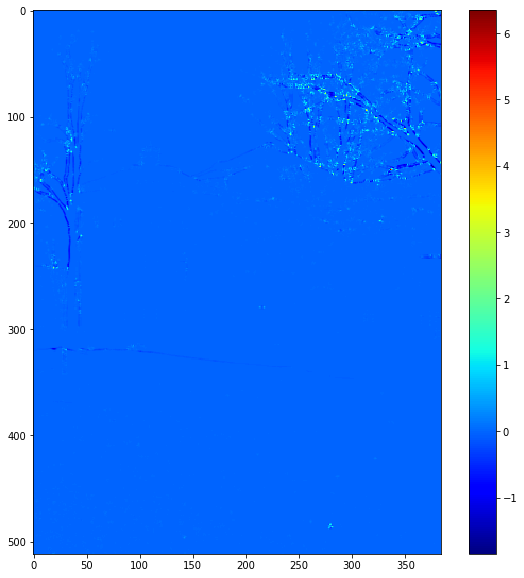

In [133]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='jet')
plt.colorbar()
plt.show()

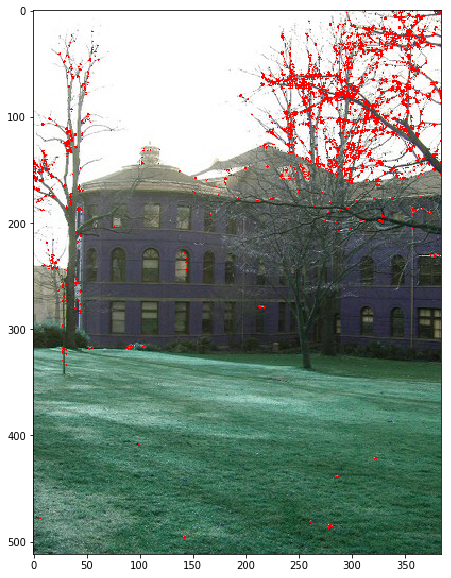

In [135]:
plt.figure(figsize=(10,10))
img = img_list[0].copy()
img[cm>0.01*cm.max()] = [255,0,0]
plt.imshow(img)
plt.show()

In [120]:
a = np.array([[0,0,0],[2,2,2]])
np.searchsorted(a[:,2],5)

2

In [144]:
[[1,2,3],[4,5,6],[4,5,6]][1:]

[[4, 5, 6], [4, 5, 6]]

In [279]:
3**2

9

In [280]:
3*3

9

In [281]:
0**2

0

In [282]:
0*0

0

In [287]:
255*255

65025

In [288]:
255**2

65025

In [290]:
a=255
print(a**2)
print(a*a)

65025
65025
